# Task - 03 :- Wine quality prediction

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset=pd.read_csv("winequality-red.csv")

In [4]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
dataset["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Good =1 and Bad=0

In [9]:
ab=[]
for x in dataset['quality']:
    if x>6.5:
        ab.append(1)
    else:
        ab.append(0)

In [10]:
x=dataset.iloc[:,:-1].values
y=pd.DataFrame(ab).values

### Check the Data Imbalancing

In [11]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data,y_data=sm.fit_resample(x,y)

In [12]:
from collections import Counter
print(Counter(y_data))

Counter({0: 1382, 1: 1382})


In [13]:
x_data.shape

(2764, 11)

### Lets check Histo Chart and Corr()

In [14]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

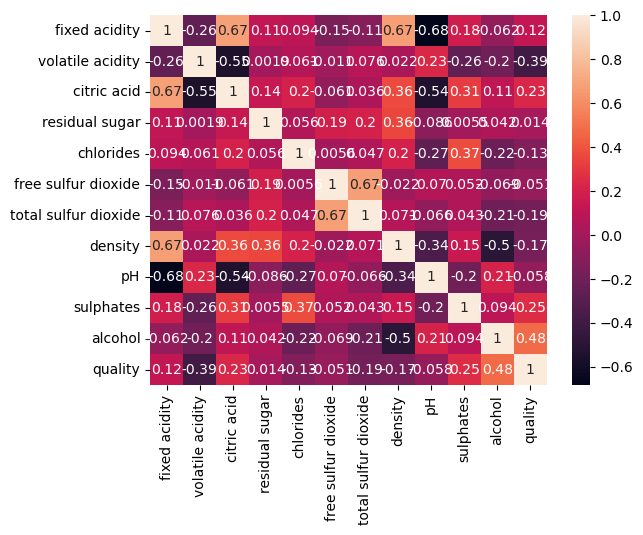

In [15]:
# Plot with HeatMap
import seaborn as sns
sns.heatmap(data=dataset.corr(),annot=True)

<AxesSubplot:ylabel='Count'>

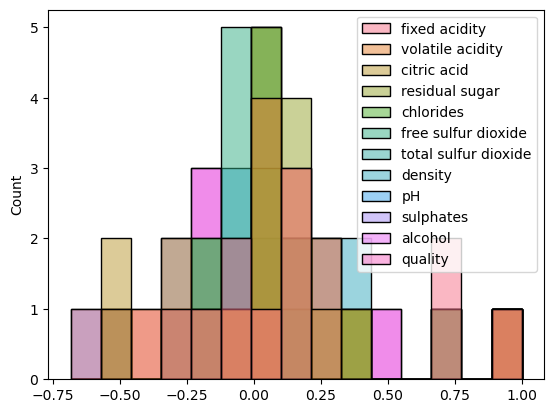

In [16]:
# Plot with Histplot
sns.histplot(data=dataset.corr())

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

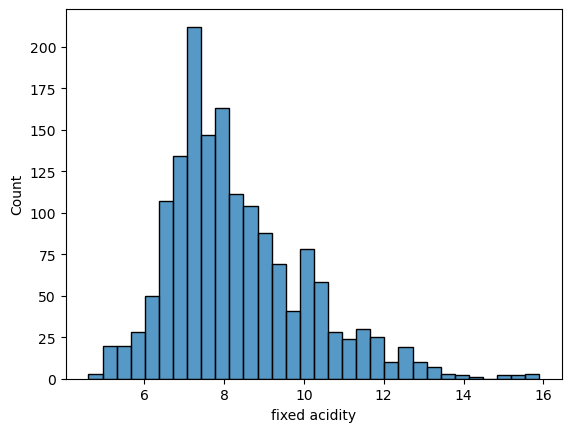

In [17]:
sns.histplot(data=dataset["fixed acidity"])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

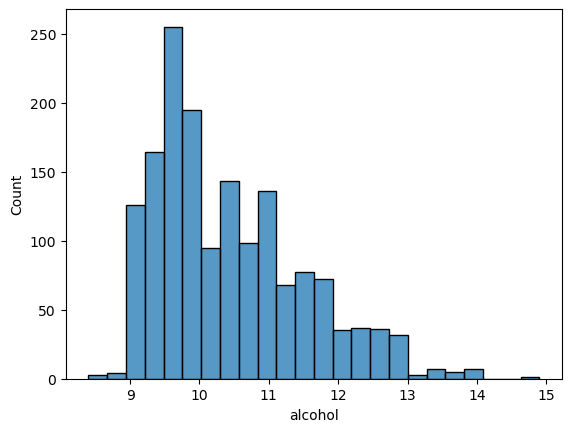

In [18]:
sns.histplot(data=dataset["alcohol"])

<AxesSubplot:xlabel='pH', ylabel='Count'>

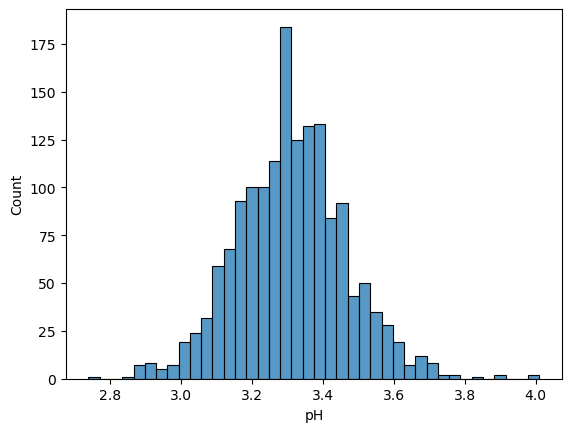

In [19]:
sns.histplot(data=dataset["pH"])

<AxesSubplot:xlabel='density', ylabel='Count'>

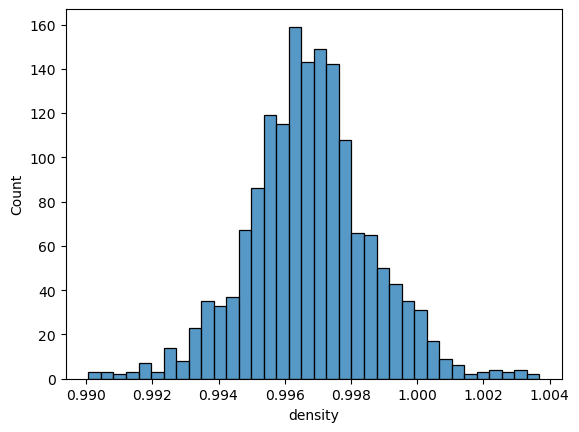

In [20]:
sns.histplot(data=dataset["density"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

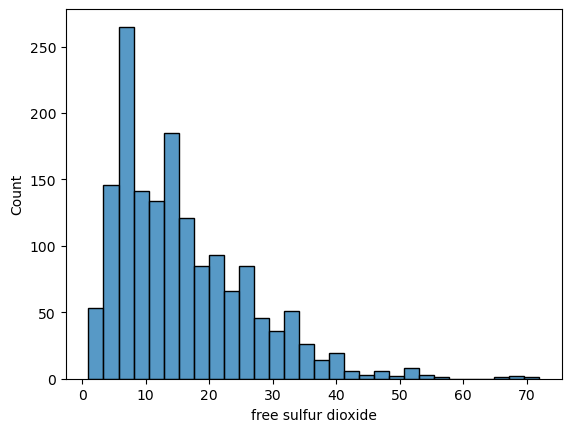

In [21]:
sns.histplot(data=dataset["free sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

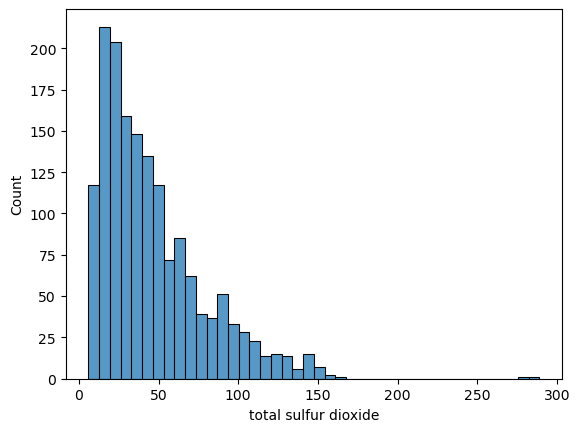

In [22]:
sns.histplot(data=dataset["total sulfur dioxide"])

### Lets do Train and Test Spliting

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=13)

### Lets work on Data Scaling 

In [24]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_scale=sd.fit_transform(x_train)
test_scale=sd.fit_transform(x_test)

### Now build the model

In [25]:
from sklearn.linear_model import LogisticRegression  
l1=LogisticRegression()
l1.fit(train_scale,y_train)

LogisticRegression()

In [26]:
# You have applied Test Case to check Accuracy Score
y_pred_log=l1.predict(test_scale)
print(y_pred_log)


from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred_log)*100
print("Accuracy score :- ",ac)

[1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 0 

### Finally we can check with the single observations

In [29]:
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [30]:
y_pred_log=l1.predict([[7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4]])
print(y_pred_log)#Bad


y_pred_log=l1.predict([[8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.9968,3.30,1.20,10.3]])
print(y_pred_log)#Good

[0]
[1]


#### Conclusion :-  Here we conclude that the dataset contains there are much more normal wines than excellent or poor ones.